In [1]:
#https://www.sejuku.net/blog/64374

#必要なライブラリのインポート
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
#回帰分析用ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor as RFR
#データ分割、パラメータサーチ用ライブラリ
from sklearn.model_selection import train_test_split, GridSearchCV

#データのロード
boston = datasets.load_boston()
 
#データの分割（学習データとテストデータ）
train_data_bs, test_data_bs, train_labels_bs, test_labels_bs \
= train_test_split(boston.data, boston.target, test_size=0.2)

#ランダムフォレストのパラメータ指定
rg = RFR(n_jobs=-1, random_state=2525)
#モデルを学習 
rg.fit(train_data_bs,train_labels_bs)


C:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=2525, verbose=0,
                      warm_start=False)

In [2]:
#学習済みモデルの評価
predicted_labels_bs = rg.predict(test_data_bs)
rg.score(test_data_bs, test_labels_bs)

0.8661147237997747

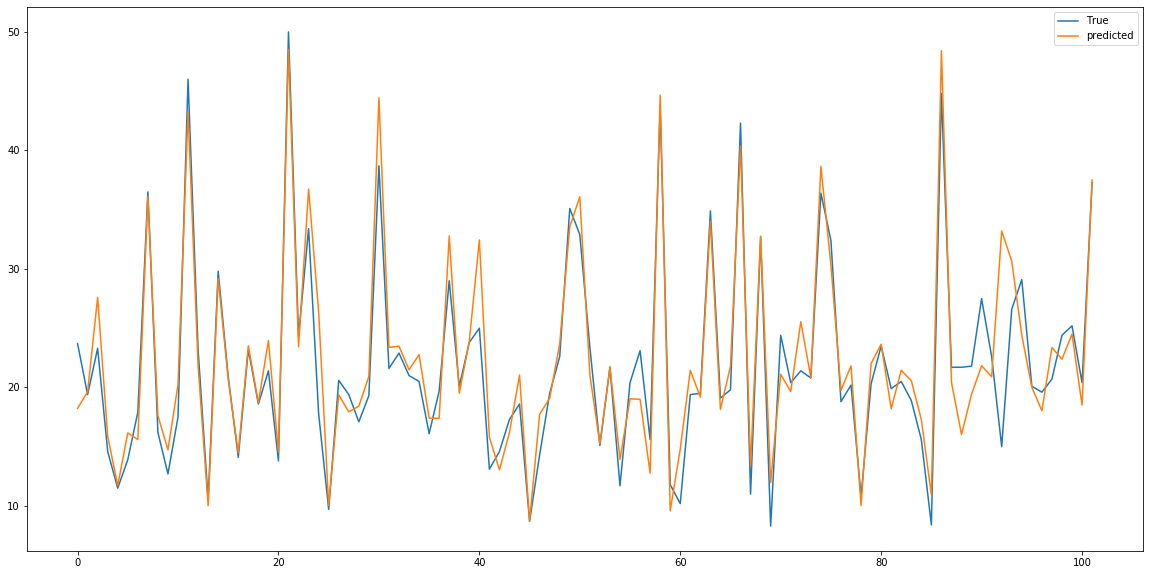

In [3]:
#折れ線グラフで可視化
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(predicted_labels_bs, label="predicted")
plt.legend()

In [4]:
#ハイパーパラメータをチューニングするため、パラメータサーチする
#（どのパラメータが最適かいろいろ入れてみる）
search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
    'max_features'      : [i for i in range(1,train_data_bs.shape[1])],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
    'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}
 
gsr = GridSearchCV(
    RFR(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True
)
 
gsr.fit(train_data_bs, train_labels_bs)

Fitting 3 folds for each of 8400 candidates, totalling 25200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2857 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 6107 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 10657 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 16507 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 23657 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 25200 out of 25200 | elapsed:  2.4min finished
C:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20, 2

In [5]:
#最も結果が良かったパラメータを見る
print(gsr.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                      oob_score=False, random_state=2525, verbose=0,
                      warm_start=False)


In [6]:
#最も結果が良かったモデルの評価
gsr.best_estimator_.score(test_data_bs, test_labels_bs)

0.8836006394439718

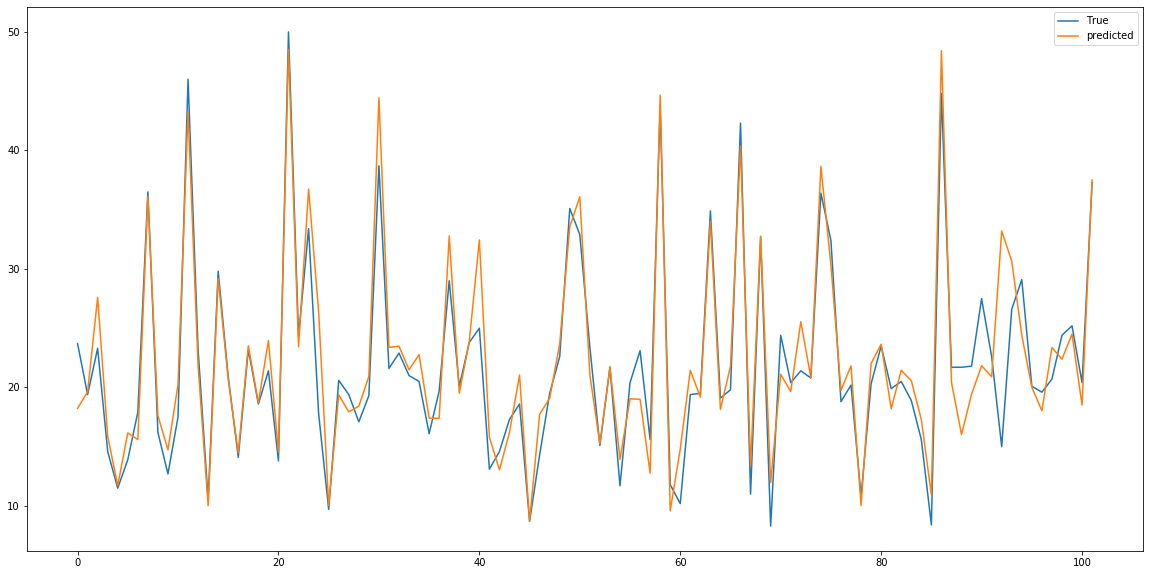

In [7]:
#折れ線グラフで可視化
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(predicted_labels_bs, label="predicted")
plt.legend()